In [1]:
import os
os.chdir('../')

from visualization import Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
project = 'rehersal Alexnet MNIST Task IL tr-t split v2'


viz = Visualization(project=project)


In [3]:
viz.extract_all_runs_metrics()

In [16]:
df = viz.metrics_df.copy()

# for i, params in enumerate(df.UID.apply(lambda x: x.split(';'))):
#     for c, param in zip(viz.UID, params):
#         df.loc[i, c] = param

df = df[(df['learning_rate']=='0.001') & (df['epochs']=='5') & (df['rehearsal_dataset']!='dead_leaves-squares')]

In [17]:
df

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,rehearsal_dataset,batch_size_rehearsal,pretraining,learning_rate,epochs,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
11,dead_leaves-mixed;128.0;True;0.001;5;,81.849998,89.29575,3.275000,94.949997,67.150002,77.750000,78.105000,1.500000,82.250000,...,dead_leaves-mixed,128.0,True,0.001,5,85.159999,83.900002,44.003950,1.775000,89.859999
12,dead_leaves-oriented;128.0;True;0.001;5;,69.699997,73.85375,2.925001,81.400002,53.000000,80.199997,87.169375,4.250000,92.949997,...,dead_leaves-oriented,128.0,True,0.001,5,78.939998,77.949997,41.680667,3.075001,86.130000
13,dead_leaves-mixed;128.0;True;0.001;5;,71.599998,79.78225,4.212500,88.449997,49.900002,70.500000,84.935937,6.916667,91.250000,...,dead_leaves-mixed,128.0,True,0.001,5,76.990001,71.599998,42.453235,3.770833,86.900000
14,dead_leaves-oriented;128.0;True;0.001;5;,64.300003,73.54150,4.324999,81.599998,55.799999,67.199997,84.195312,9.183334,94.750000,...,dead_leaves-oriented,128.0,True,0.001,5,71.050000,67.199997,42.193473,5.701667,86.420000
15,dead_leaves-mixed;128.0;False;0.001;5;,64.599998,74.92425,6.187500,89.349998,50.000000,75.099998,80.294062,3.516668,85.650002,...,dead_leaves-mixed,128.0,False,0.001,5,82.009999,87.199997,44.041770,2.910835,90.920001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,None;128.0;False;0.001;5;,69.800003,70.98350,2.375000,79.300003,50.000000,61.500000,63.643437,3.250000,71.250000,...,None,128.0,False,0.001,5,80.720001,82.449997,41.071944,2.045000,85.680000
123,None;128.0;False;0.001;5;,79.550003,78.54025,1.224998,84.449997,50.000000,94.000000,92.274688,0.516668,95.550003,...,None,128.0,False,0.001,5,86.830000,85.900002,43.746014,1.708332,89.959999
124,None;128.0;False;0.001;5;,95.099998,93.59000,0.362501,96.550003,37.799999,94.400002,91.497188,0.449999,95.750000,...,None,128.0,False,0.001,5,93.340001,94.650002,46.031260,0.392499,94.189999
125,None;128.0;False;0.001;5;,88.400002,91.36250,1.662500,95.050003,52.849998,69.150002,77.051875,4.300001,82.050003,...,None,128.0,False,0.001,5,86.720001,88.800003,45.804666,2.537499,92.260001


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[2]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

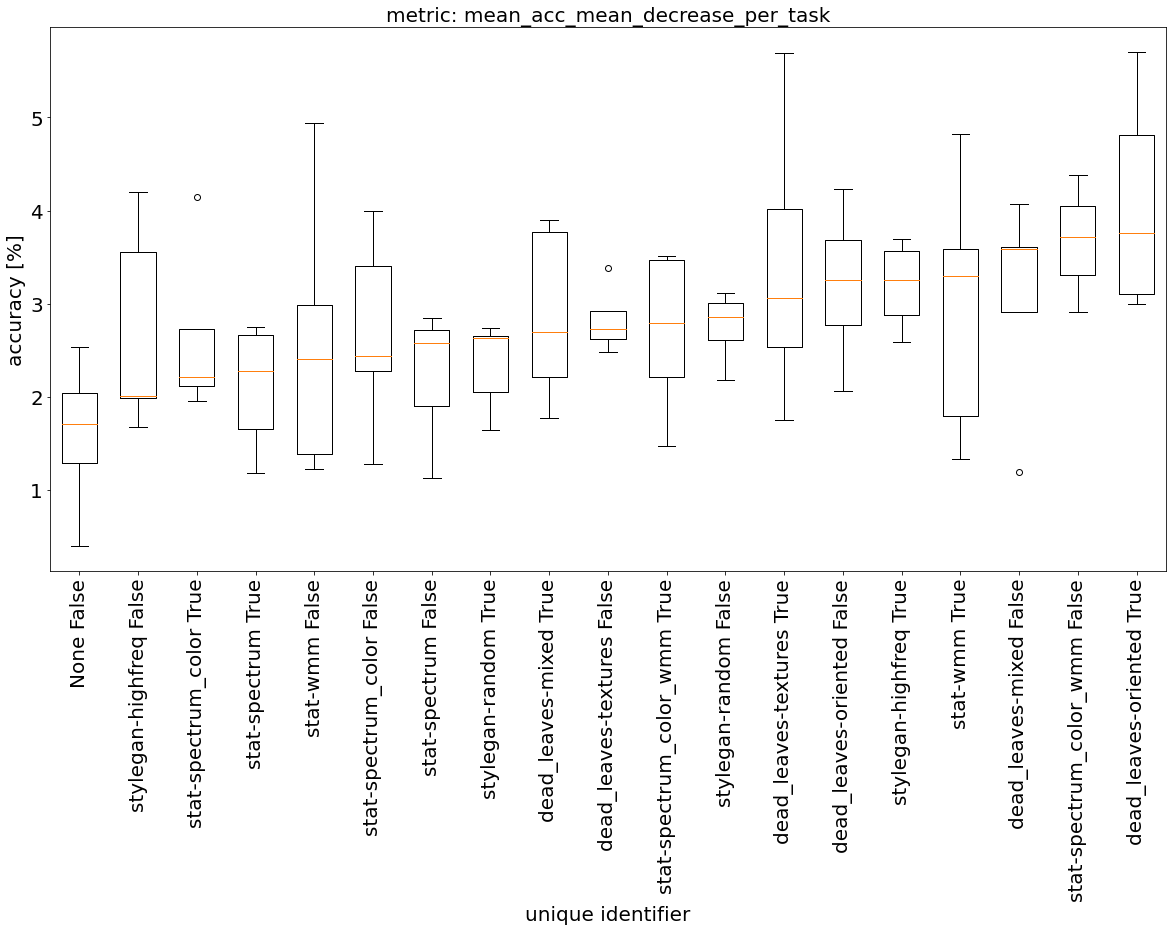

In [29]:
metric = 'mean_acc_mean_decrease_per_task'
box_plot(metric, df, f"AlexNet_{metric}")

In [7]:
viz.plot_single_setting(todo)

AttributeError: 'Visualization' object has no attribute 'plot_single_setting'